In [8]:
import pandas as pd
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


like          406
know          380
oh            322
never         294
na            261
love          252
back          240
time          224
got           183
one           179
say           176
see           170
baby          159
wan           158
would         156
could         156
think         153
come          150
go            149
want          142
ever          134
said          127
ca            120
look          116
right         110
take          108
get           107
yeah          103
wish          102
gon           101
stay          100
tell           99
night          96
made           91
still          85
let            84
things         81
bad            80
away           80
girl           80
around         78
ooh            78
home           76
good           76
new            75
better         74
way            73
shake          73
everything     72
knew           71
dtype: int64


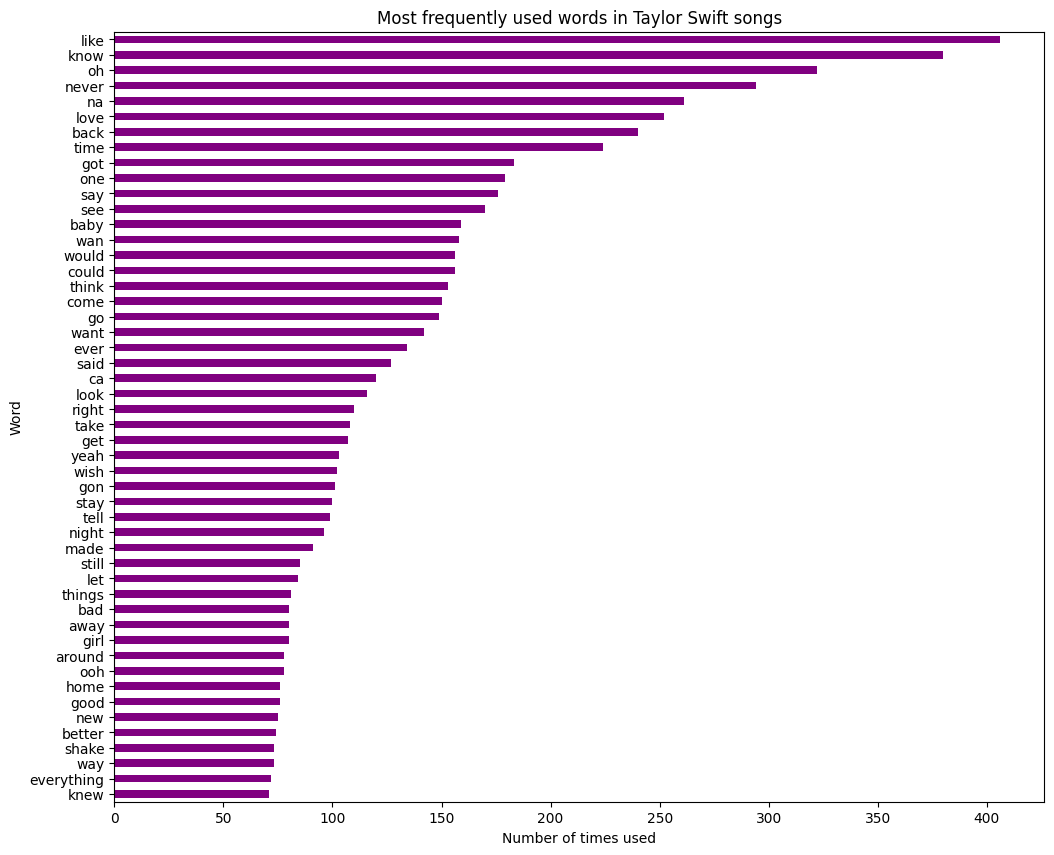

In [7]:
# Ensure NLTK components are available
nltk.download('punkt')
nltk.download('stopwords')

# # Reading the data
# beyonce_lyrics = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-09-29/beyonce_lyrics.csv')
# taylor_swift_lyrics = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-09-29/taylor_swift_lyrics.csv')

# Combine lyrics for analysis (assuming you want to analyze both artists together)
all_lyrics = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-09-29/taylor_swift_lyrics.csv')


# Tokenize and clean the data
stop_words = set(stopwords.words('english'))
all_lyrics['tokens'] = all_lyrics['Lyrics'].apply(lambda x: [word.lower() for word in word_tokenize(str(x)) if word.isalpha() and word.lower() not in stop_words])

# Flatten the list of tokens and count word frequencies
all_words = [word for tokens in all_lyrics['tokens'] for word in tokens]
word_freq = pd.Series(all_words).value_counts()

# Display the most popular words
most_popular_words = word_freq.head(50)
print(most_popular_words)

# Create a horizontal bar plot
plt.figure(figsize=(12, 10))
most_popular_words.sort_values().plot(kind='barh', color='purple')
plt.title('Most frequently used words in Taylor Swift songs')
plt.xlabel('Number of times used')
plt.ylabel('Word')
plt.show()

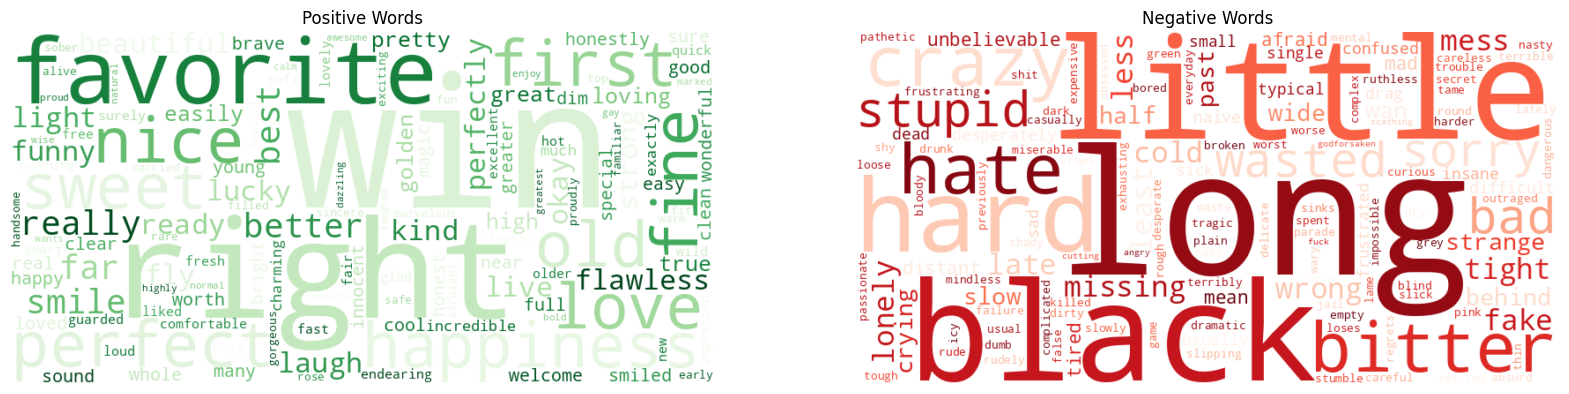

In [5]:
# Define colors (adjust the hex values to your liking or get them from somewhere else)
tswift_colors = {"positive": "#1db954", "negative": "#eb4034"}

# Read the data (we'll just use the previously combined dataframe `all_lyrics`)
# Assuming `all_lyrics` is already defined and contains the combined lyrics data

# Filter out specific words
words_to_filter = ["ooh", "yeah", "ah", "uh", "ha", "whoa", "eh", "hoo", "ey", "mmm", "eeh", "huh", "na"]
all_lyrics['filtered_tokens'] = all_lyrics['tokens'].apply(lambda x: [word for word in x if word not in words_to_filter])

# Flatten the list of tokens and perform sentiment analysis
all_words = [word for tokens in all_lyrics['filtered_tokens'] for word in tokens]
sentiments = {word: TextBlob(word).sentiment.polarity for word in all_words}

# Separate words by sentiment
positive_words = ' '.join([word for word, sentiment in sentiments.items() if sentiment > 0])
negative_words = ' '.join([word for word, sentiment in sentiments.items() if sentiment < 0])

# Generate the word cloud
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_words)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_words)

# Plot the word cloud
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Words')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Words')
plt.show()

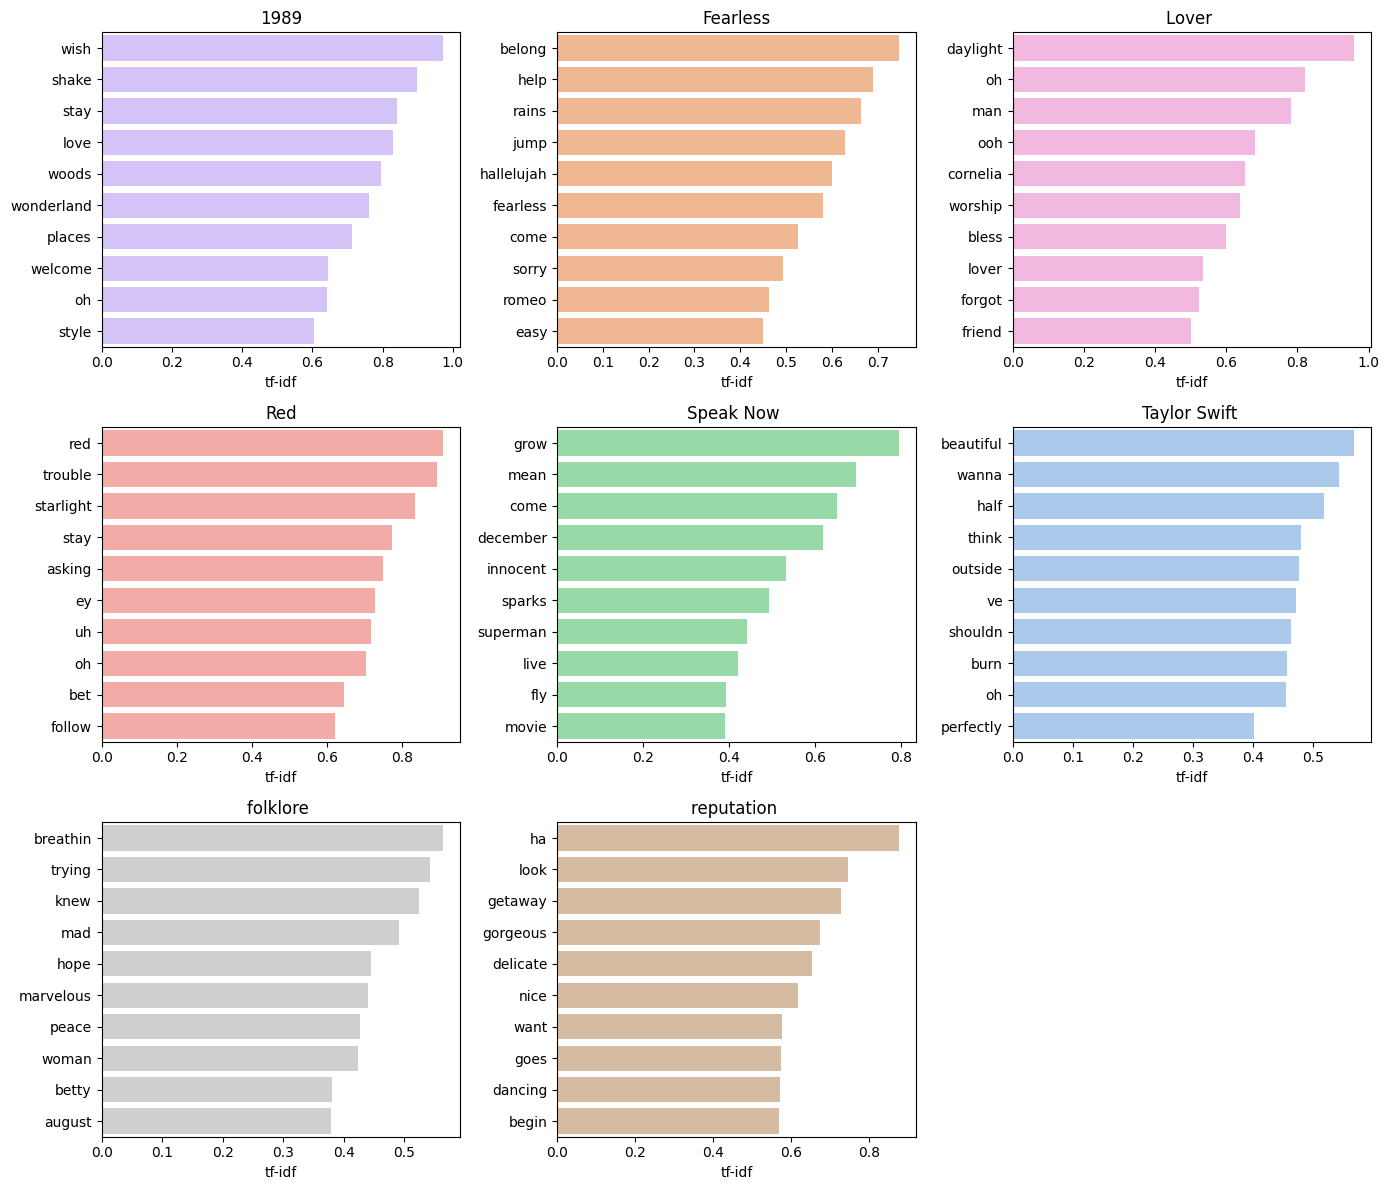

In [15]:
# Initialize the TF-IDF Vectorizer with English stopwords
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the data
tfidf_matrix = tfidf_vectorizer.fit_transform(all_lyrics['Lyrics'])

# Create a DataFrame for TF-IDF vectors and add the album names
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=all_lyrics.index, columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df['Album'] = all_lyrics['Album']

# Calculate the TF-IDF score for each word-album combination
tfidf_df = tfidf_df.melt(id_vars='Album', var_name='Word', value_name='TF-IDF')

# Get the top 10 words for each album based on TF-IDF score
top_tfidf = tfidf_df.groupby('Album').apply(lambda x: x.nlargest(10, 'TF-IDF')).reset_index(drop=True)

# Define color palette for albums
album_colors = sns.color_palette("pastel", len(all_lyrics['Album'].unique()))
color_dict = dict(zip(all_lyrics['Album'].unique(), album_colors))

# Plot setup
albums = top_tfidf['Album'].unique()
n_albums = len(albums)
n_cols = 3  # You can change this to fit your preferred layout
n_rows = n_albums // n_cols + (n_albums % n_cols > 0)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 4*n_rows), sharex=False, sharey=False)
axes = axes.flatten()

# Plot each album's important words in a separate subplot
for i, album in enumerate(albums):
    ax = axes[i] if n_albums > 1 else axes
    data = top_tfidf[top_tfidf['Album'] == album]
    sns.barplot(x='TF-IDF', y='Word', data=data, ax=ax, color=color_dict[album])
    ax.set_title(album)
    ax.set_xlabel('tf-idf')
    ax.set_ylabel('')

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

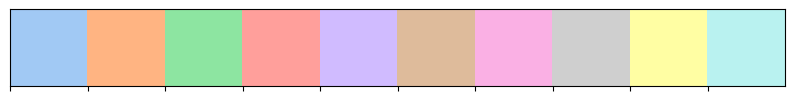

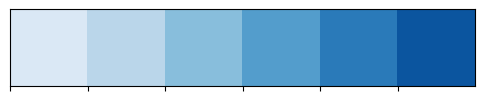

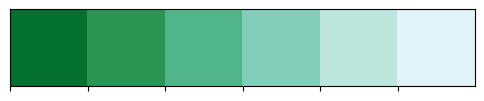

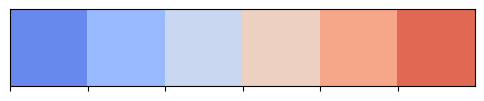

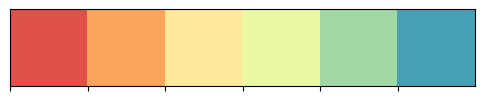

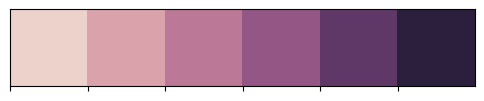

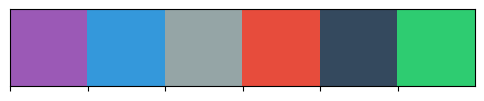

In [14]:
import seaborn as sns

# Display qualitative palettes
sns.palplot(sns.color_palette("pastel"))

# Display sequential palettes
sns.palplot(sns.color_palette("Blues"))
sns.palplot(sns.color_palette("BuGn_r"))  # Note the "_r" which reverses the palette

# Display diverging palettes
sns.palplot(sns.color_palette("coolwarm"))
sns.palplot(sns.color_palette("Spectral"))

# Display a cubehelix palette
sns.palplot(sns.cubehelix_palette())

# Display a custom palette
sns.palplot(sns.color_palette(["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]))
